### About the data set  (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Year:** Year the observations were recorded

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Hepatitis B:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country


**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats as stats
import warnings
warnings.filterwarnings('ignore')

#### Load the Life expectancy dataset and display the first five records 

In [2]:
df= pd.read_csv('Life_Expectancy(1).csv')
print(df.shape)
df.head()

(182, 20)


,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Albania,2015,Developing,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,Algeria,2015,Developing,19.0,21,NaN,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,Angola,2015,Developing,335.0,66,NaN,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,Antigua,2015,Developing,13.0,0,NaN,99.0,0,47.7,0,86,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,76.4


#### Check the shape of the data and display its information

In [3]:
# check the size of the dataframe

# type your code here

In [4]:
df.info

<bound method DataFrame.info of          Country  Year      Status  Adult_Mortality  Infant_Deaths  Alcohol  \
0    Afghanistan  2015  Developing            263.0             62     0.01   
1        Albania  2015  Developing             74.0              0     4.60   
2        Algeria  2015  Developing             19.0             21      NaN   
3         Angola  2015  Developing            335.0             66      NaN   
4        Antigua  2015  Developing             13.0              0      NaN   
..           ...   ...         ...              ...            ...      ...   
177    Venezuela  2015  Developing            157.0              9      NaN   
178     Viet Nam  2015  Developing            127.0             28      NaN   
179        Yemen  2015  Developing            224.0             37      NaN   
180       Zambia  2015  Developing             33.0             27      NaN   
181     Zimbabwe  2015  Developing            336.0             22      NaN   

     Hepatitis B  M

### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Data Preparation

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The dataset gives the life expectancy for different countries. Check if any information about life expectancy is missing from the given records. How do we fix the problem if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
df.columns = [i.strip() for i in df.columns]

In [6]:
df.columns

Index(['Country', 'Year', 'Status', 'Adult_Mortality', 'Infant_Deaths',
       'Alcohol', 'Hepatitis B', 'Measles', 'BMI', 'Underfive_Deaths', 'Polio',
       'Diphtheria', 'HIV', 'GDP', 'Population', 'Malnourished10_19',
       'Malnourished5_9', 'Income_Index', 'Schooling', 'Life_Expectancy'],
      dtype='object')

In [7]:
df.isna().sum()

Country                0
Year                   0
Status                 0
Adult_Mortality        9
Infant_Deaths          0
Alcohol              167
Hepatitis B            9
Measles                0
BMI                    4
Underfive_Deaths       0
Polio                  0
Diphtheria             0
HIV                    0
GDP                   25
Population            41
Malnourished10_19      4
Malnourished5_9        4
Income_Index          13
Schooling              9
Life_Expectancy        9
dtype: int64

In [8]:
# we have 9 missing values.

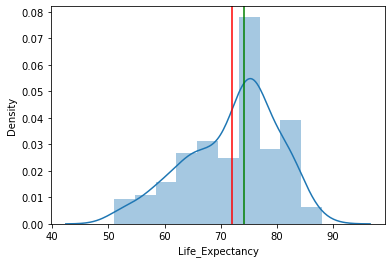

-0.5570055450291043
-0.322560114952835


In [9]:
sns.distplot(df['Life_Expectancy'])
plt.axvline(df['Life_Expectancy'].mean(), color= 'red')
plt.axvline(df['Life_Expectancy'].median(), color= 'green')
plt.show()
print(df['Life_Expectancy'].skew())
print(df['Life_Expectancy'].kurt())

In [10]:
# Left skewed data. # Platykurtic type kurtosis
# we can fill NaN with mean value as mean is lesser than median here.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How do we handle the missing values from the entire dataset?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

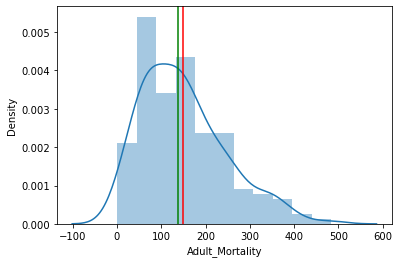

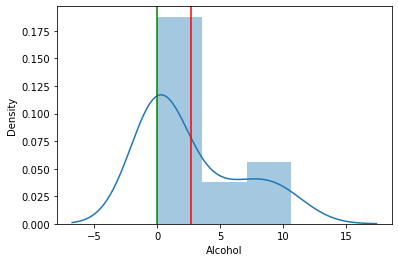

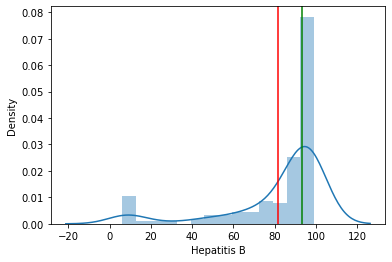

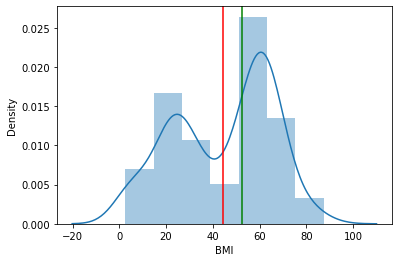

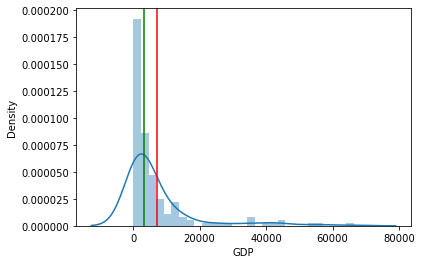

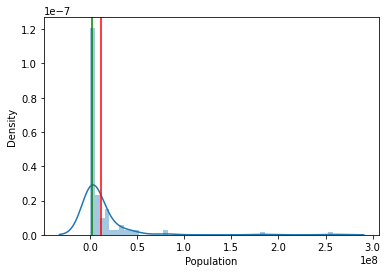

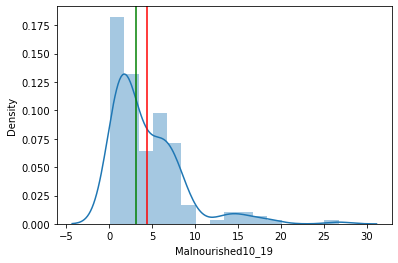

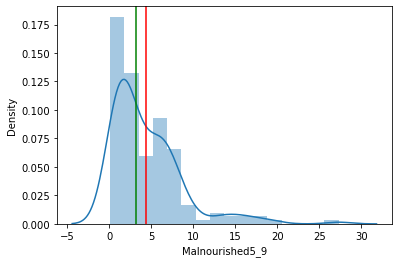

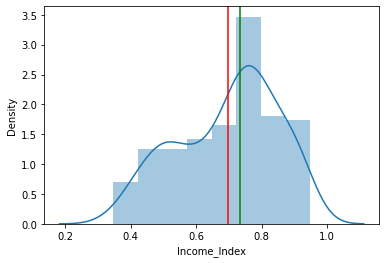

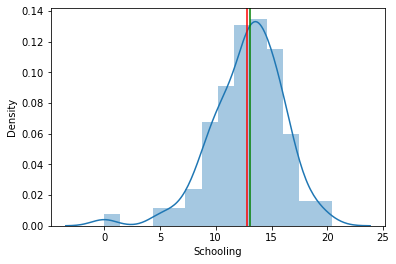

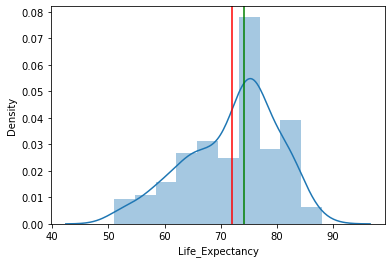

In [11]:
for i in df.columns[3:]:
  if df[i].isna().sum() > 0:
    sns.distplot(df[i])
    plt.axvline(df[i].mean(), color= 'red')
    plt.axvline(df[i].median(), color= 'green')
    plt.show()

### looking at the distributions of the plots, we can say the following inferences:

 Adumt_mortality - Mean imputation 

 Alcohol- Mean imputation

 hepatitis B- Median imputation

 BMI- Mean imputation

 GDP - Median imputation

 Population - Median imputation

 Malnutritition_10_19 -  Median imputation

 Malnutritition_09 -  Median imputation

 Income- Median imputation

 Schooling- Mean imputation

 Life Expectancy - Median imputation


In [12]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [13]:
df.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Albania,2015,Developing,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,Algeria,2015,Developing,19.0,21,NaN,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,Angola,2015,Developing,335.0,66,NaN,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,Antigua,2015,Developing,13.0,0,NaN,99.0,0,47.7,0,86,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,76.4


In [14]:
exp= df['Life_Expectancy']
df_n = df.copy()
df_n.drop({'Life_Expectancy'}, axis=1, inplace=True)

In [15]:
dfn= df_n.iloc[:, 3:]

In [16]:
dfn = dfn.fillna(dfn.median())

In [17]:
exp.fillna(exp.median(), inplace=True)

In [18]:
exp.isna().sum()

0

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any redundant features in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# we can check based on significance level
import statsmodels.api as sm
xc= sm.add_constant(dfn)
md= sm.OLS(exp, xc).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     78.86
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           1.57e-68
Time:                        16:42:22   Log-Likelihood:                -436.30
No. Observations:                 182   AIC:                             906.6
Df Residuals:                     165   BIC:                             961.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                52.9943      2.06

In [20]:
# based on p values- yes- GDP, Diphtheria, Population are quite insignificant.

<AxesSubplot:>

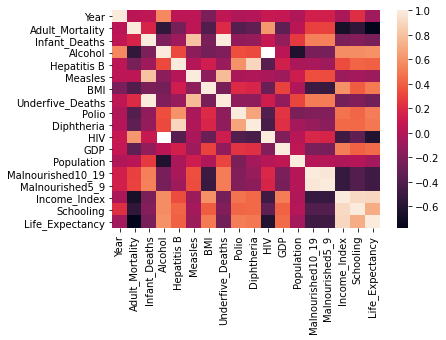

In [21]:
sns.heatmap(df.corr())

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Perform dummy encoding for appropriate variables of the dataset if required</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
dfn['Year'] = df['Year']
dfn['status'] = df['Status']

In [23]:
dfn = pd.get_dummies(data= dfn, columns=['Year', 'status'], drop_first=True)
dfn.head()

,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Year_2015,status_Developing
0,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,1
1,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,1,1
2,19.0,21,0.01,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,1,1
3,335.0,66,0.01,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,1,1
4,13.0,0,0.01,99.0,0,47.7,0,86,99,0.2,13566.954100,1977527.0,3.3,3.3,0.784,13.9,1,1


<a id="lf"> </a>
## 2. Linear Regression

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5.  Build a full model on the given data. Check whether the obtained residuals have constant variance
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
xc= sm.add_constant(dfn)
md= sm.OLS(exp, xc).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     70.50
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           3.45e-67
Time:                        16:42:23   Log-Likelihood:                -434.85
No. Observations:                 182   AIC:                             907.7
Df Residuals:                     163   BIC:                             968.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                54.6325      2.54

In [25]:
# we can do a Gold feld test.

sm.stats.diagnostic.het_goldfeldquandt(md.resid, md.model.exog)

(1.2287048480538363, 0.19214385047667107, 'increasing')

In [26]:
# we fail to reject null hypothesis. 

# variance is constant across data

In [27]:
md.resid.shape

(182,)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a model to study the impact of immunization on life expectancy, using least squares regression. Find the unexplained variation for the model
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
df.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Albania,2015,Developing,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,Algeria,2015,Developing,19.0,21,NaN,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,Angola,2015,Developing,335.0,66,NaN,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,Antigua,2015,Developing,13.0,0,NaN,99.0,0,47.7,0,86,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,76.4


In [29]:
imm = ['Hepatitis B', 'Measles', 'Polio', 'Diphtheria']
df_imm = df[imm]
df_imm.head()

,Hepatitis B,Measles,Polio,Diphtheria
0,65.0,1154,6,65
1,99.0,0,99,99
2,95.0,63,95,95
3,64.0,118,7,64
4,99.0,0,86,99


In [30]:
xc[imm]

,Hepatitis B,Measles,Polio,Diphtheria
0,65.0,1154,6,65
1,99.0,0,99,99
2,95.0,63,95,95
3,64.0,118,7,64
4,99.0,0,86,99
...,...,...,...,...
177,87.0,0,87,87
178,97.0,256,97,97
179,69.0,468,63,69
180,9.0,9,9,9


In [31]:
import statsmodels.api as sm
rtr= sm.add_constant(xc[imm])
md= sm.OLS(exp, rtr).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     21.00
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           3.49e-14
Time:                        16:42:23   Log-Likelihood:                -597.26
No. Observations:                 182   AIC:                             1205.
Df Residuals:                     177   BIC:                             1221.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.6563      1.930     28.841      

In [32]:
# Great results! We are getiing an R square of over 32 percent, Lets get rid of Measles and see.

imm.remove('Measles')

In [33]:
imm

['Hepatitis B', 'Polio', 'Diphtheria']

In [34]:
rt= sm.add_constant(xc[imm])
md= sm.OLS(exp, rt).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     27.47
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           1.20e-14
Time:                        16:42:23   Log-Likelihood:                -597.98
No. Observations:                 182   AIC:                             1204.
Df Residuals:                     178   BIC:                             1217.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.5279      1.929     28.787      

In [35]:
# Interesting. Same. r sqaure. lets get rid of Hepatitis and see

In [36]:
#imm.remove('Hepatitis B')
rt= sm.add_constant(xc[imm])
md= sm.OLS(exp, rt).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     27.47
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           1.20e-14
Time:                        16:42:23   Log-Likelihood:                -597.98
No. Observations:                 182   AIC:                             1204.
Df Residuals:                     178   BIC:                             1217.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.5279      1.929     28.787      

In [37]:
# SO basically only 2 variables- Polio and Diptheria are enough to get an R square of over 31.5%

In [38]:
# Unexplained variance:

ss1 = np.sum((df['Life_Expectancy'].mean() - df['Life_Expectancy'])**2)
print(md.ess)
print(ss1)

3523.7434810466875
11134.818021978022


In [39]:
ss1/md.ssr

1.4629758205751986

In [40]:
(1 - md.rsquared)*100  # the unexplained varation of the model

68.3538296351904

<AxesSubplot:>

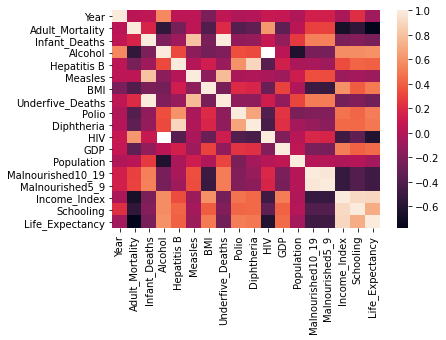

In [41]:
sns.heatmap(df.corr())

In [42]:
df.columns

Index(['Country', 'Year', 'Status', 'Adult_Mortality', 'Infant_Deaths',
       'Alcohol', 'Hepatitis B', 'Measles', 'BMI', 'Underfive_Deaths', 'Polio',
       'Diphtheria', 'HIV', 'GDP', 'Population', 'Malnourished10_19',
       'Malnourished5_9', 'Income_Index', 'Schooling', 'Life_Expectancy'],
      dtype='object')

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a model to study the impact of malnutrition on life expectancy, using least squares regression. Interpret the coeffients</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
mal = ['Malnourished10_19', 'Malnourished5_9']
rtr1= sm.add_constant(xc[mal])
md11= sm.OLS(exp, rtr1).fit()
print(md11.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     25.66
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           1.60e-10
Time:                        16:42:24   Log-Likelihood:                -609.67
No. Observations:                 182   AIC:                             1225.
Df Residuals:                     179   BIC:                             1235.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                76.0391      0.75

In [44]:
# although the coedd is high- the p value is showing considerable insignificance - even the r square is less. 

In [45]:
# Expectency would be:

# Life expectancy (in years) = -76.0 - 0.38(x1) - 0.510(x2)

<a id="gd"> </a>
## 3. Gradient Descent

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a model to study the influence of adult mortality rate on life expectancy using both the least squares regression and gradient descent approach. Are the fits for both the models different?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
# Using OLS

rtr1= sm.add_constant(xc['Adult_Mortality'])
md11= sm.OLS(exp, rtr1).fit()
print(md11.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     268.9
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           1.45e-37
Time:                        16:42:24   Log-Likelihood:                -549.44
No. Observations:                 182   AIC:                             1103.
Df Residuals:                     180   BIC:                             1109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              81.8259      0.698    1

In [47]:
# Good feature! alone explains 60 percent of the variation in data

In [48]:
# Using Gradiant Descent

from scipy.optimize import minimize

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
def linear_regression(X, y, m_current=0, b_current=0, epochs=1000, learning_rate=0.0001):
     N = float(len(y))
     for i in range(epochs):
          y_current = (m_current * X) + b_current
          cost = sum([data**2 for data in (y-y_current)]) / N
          m_gradient = -(2/N) * sum(X * (y - y_current))
          b_gradient = -(2/N) * sum(y - y_current)
          m_current = m_current - (learning_rate * m_gradient)
          b_current = b_current - (learning_rate * b_gradient)
     return m_current, b_current, cost

# Work in progress

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a model to analyze the influence of immunization on life expectancy. Use SGD and plot a horizontal multiple barchart to compare the values of beta coefficients with values obtained by the full model build least squares regression.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(xc[['Hepatitis B', 'Measles', 'Polio', 'Diphtheria']], exp)

SGDRegressor()

In [52]:
sgd.coef_

array([ 6.04193804e+11,  4.33781981e+11, -3.16104167e+11, -7.06349242e+11])

In [53]:
xy= sm.add_constant(xc[['Hepatitis B', 'Measles', 'Polio', 'Diphtheria']])
model = sm.OLS(exp, xy).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     21.00
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           3.49e-14
Time:                        16:42:25   Log-Likelihood:                -597.26
No. Observations:                 182   AIC:                             1205.
Df Residuals:                     177   BIC:                             1221.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.6563      1.930     28.841      

In [54]:
a = list(sgd.coef_/1000000000000)
b= list(model.params[1:])
rr= pd.DataFrame({'sgd': a, 'Linear':b})
rr.head()

,sgd,Linear
0,0.604194,-0.052378
1,0.433782,-0.000073
2,-0.316104,0.103351
3,-0.706349,0.145787


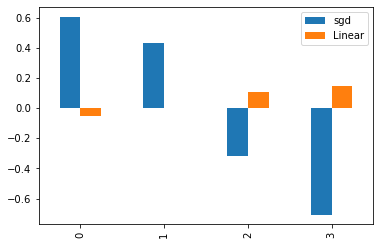

In [55]:
rr.plot(kind='bar')
plt.show()

In [56]:
from sklearn.model_selection import train_test_split

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full model using least squares regression. Check whether the model overfits the training data or not.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [57]:
xtr, xts, ytr, yts = train_test_split(xc, exp)

In [58]:
xy= sm.add_constant(xtr)
model = sm.OLS(ytr, xy).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     54.45
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           3.43e-48
Time:                        16:42:25   Log-Likelihood:                -322.20
No. Observations:                 136   AIC:                             682.4
Df Residuals:                     117   BIC:                             737.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                56.6207      2.93

In [59]:
# testing set

xy= sm.add_constant(xts)
ypred = model.predict(xy)
from sklearn.metrics import r2_score

r2_score(yts, ypred)

0.8339665910931324

In [60]:
# yes the model is overfitting slight on the traning data

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Can we use a linear regression model to analyze how all features from the dataset impact life expectancy?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [61]:
# Yes. 

xy= sm.add_constant(xtr)
model = sm.OLS(ytr, xy).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     54.45
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           3.43e-48
Time:                        16:42:25   Log-Likelihood:                -322.20
No. Observations:                 136   AIC:                             682.4
Df Residuals:                     117   BIC:                             737.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                56.6207      2.93

In [62]:
# highest contributing features are - Adult_Mortality, Infacnt- deaths, Income_Index, Hepatitis B 

In [63]:
# we can analyze by looking at the coefficeints

<a id="reg"> </a>
## 4. Regularization

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Can we perform regression analysis without eliminating features involved in multicollinearity detected in question 11?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [64]:
# lets check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

gt= pd.DataFrame()
gt['vars'] = xc.columns
gt['vif_score'] = [vif(xc.values, i) for i in range(xc.shape[1])]


In [65]:
gt

,vars,vif_score
0,const,150.981848
1,Adult_Mortality,2.345130
2,Infant_Deaths,162.920206
3,Alcohol,1.105705
4,Hepatitis B,6.243168
5,Measles,4.256329
6,BMI,1.770225
7,Underfive_Deaths,141.643778
8,Polio,2.244110
9,Diphtheria,7.206809


In [66]:
# features having high multicollinearity are- Infant_Deaths, Underfive_Deaths, Malnourished10_19, Malnourished5_9

In [67]:
# none of the above features are contributing that much - coeff wise - so fairly said, model wont be disrupted that much after dropping these features

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Build a model to study the impact of diseases and immunization on life expectancy. Identify the significant variables from the model. Use 'alpha = 1.5' if required.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [68]:
xc.head()

,const,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Year_2015,status_Developing
0,1.0,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,1
1,1.0,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,1,1
2,1.0,19.0,21,0.01,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,1,1
3,1.0,335.0,66,0.01,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,1,1
4,1.0,13.0,0,0.01,99.0,0,47.7,0,86,99,0.2,13566.954100,1977527.0,3.3,3.3,0.784,13.9,1,1


In [69]:
imm= ['HIV', 'Hepatitis B', 'Measles', 'Polio', 'Diphtheria']

In [70]:
# we can use a K-fold cross val coupled with a Lasso.
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
ar= Lasso(alpha= 1.5, max_iter=10000)
cv_ = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
scores = cross_val_score(ar, xc[imm], exp, scoring = 'r2', cv=cv_, n_jobs=-1)
print('RMSE is /n', np.mean(scores))

RMSE is /n 0.3871578143911168


In [71]:
# with lasso we are getting a score of 23% - not that great. 

# lets see the significant features.

In [72]:
las= Lasso(alpha=0.1, max_iter=100000).fit(xc[imm], exp)
xc[imm].iloc[:,las.coef_!=0]

,HIV,Hepatitis B,Measles,Polio,Diphtheria
0,0.1,65.0,1154,6,65
1,0.1,99.0,0,99,99
2,0.1,95.0,63,95,95
3,1.9,64.0,118,7,64
4,0.2,99.0,0,86,99
...,...,...,...,...,...
177,0.1,87.0,0,87,87
178,0.1,97.0,256,97,97
179,0.1,69.0,468,63,69
180,4.1,9.0,9,9,9


In [73]:
las.coef_

array([-2.59503551e+00, -3.57548932e-02, -8.59473853e-05,  7.66260357e-02,
        8.43644730e-02])

In [74]:
# So most important features taken by lasso are: HIV, Hepatitis B and Polio

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a model to study the impact of malnutrition and diseases on life expectancy. Identify the insignificant variables from the model. Use 'alpha = 1' if required.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [75]:
  rrt= ['HIV', 'Hepatitis B', 'Measles', 'Polio', 'Diphtheria', 'Malnourished10_19',	'Malnourished5_9']
  las= Lasso(alpha=0.1, max_iter=100000).fit(xc[rrt], exp)

In [76]:

ww = {i:k for i,k in zip(rrt, las.coef_)}

In [77]:
sorted(ww, key=ww.get)

['HIV',
 'Malnourished5_9',
 'Malnourished10_19',
 'Hepatitis B',
 'Measles',
 'Polio',
 'Diphtheria']

In [78]:
# The last few columns are insignificant - we can look that up with p values tho

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a full model using the elastic net regression. Use 'alpha = 0.1' and 'l1_ratio=0.001'. Also, compute the RMSE for train and test sets.
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [79]:
from sklearn.linear_model import ElasticNet
el= ElasticNet(alpha= 0.1, l1_ratio=0.001, max_iter=10000).fit(xtr, ytr)

In [80]:
ypr = el.predict(xts)
y_train_pr = el.predict(xtr)
print(np.sqrt(mean_squared_error(ytr,y_train_pr)), np.sqrt(mean_squared_error(yts,ypr)))

3.1455401769076743 3.5148767191149775


In [81]:
# training set = 2.95

In [82]:
# testing set = 4.48

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a full model. Identify the features that are significantly influencing the life expectancy. Use 'alpha = 0.5' if required. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [83]:
las2= Lasso(alpha=0.5, max_iter=100000).fit(xtr, ytr)

In [84]:
# features

In [85]:
ww2 = {i:k for i,k in zip(xtr.columns, las2.coef_)}

In [86]:
ww2

{'const': 0.0,
 'Adult_Mortality': -0.039808776960109184,
 'Infant_Deaths': 0.11155424782568635,
 'Alcohol': 0.0,
 'Hepatitis B': -0.03621751718141416,
 'Measles': -0.00011126915703150037,
 'BMI': 0.024431947041728456,
 'Underfive_Deaths': -0.07780811486599737,
 'Polio': 0.018051642796907026,
 'Diphtheria': 0.08557080462130418,
 'HIV': -0.48929104705652365,
 'GDP': 5.2845472007912966e-05,
 'Population': -1.0125133598443673e-09,
 'Malnourished10_19': -0.32737739143574035,
 'Malnourished5_9': -0.011167150128770332,
 'Income_Index': 0.0,
 'Schooling': 0.5299718522047141,
 'Year_2015': -0.0,
 'status_Developing': -0.0}

In [87]:
sorted(ww2, key=ww2.get, reverse=True)

['Schooling',
 'Infant_Deaths',
 'Diphtheria',
 'BMI',
 'Polio',
 'GDP',
 'const',
 'Alcohol',
 'Income_Index',
 'Year_2015',
 'status_Developing',
 'Population',
 'Measles',
 'Malnourished5_9',
 'Hepatitis B',
 'Adult_Mortality',
 'Underfive_Deaths',
 'Malnourished10_19',
 'HIV']

In [88]:
# influencing features are: Schooling, Infant_Deaths, Polio, Hepatitis B

<a id="gs"> </a>
## 5. Grid Search 

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. If ridge regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [89]:
from sklearn.linear_model import Ridge

rr= {'alpha': [7,8,9,10,11]}

from sklearn.model_selection import KFold, GridSearchCV
ar = Ridge(max_iter=100000)
gs= GridSearchCV(ar, param_grid= rr, scoring= 'r2', cv=3)
gs.fit(xtr, ytr)

GridSearchCV(cv=3, estimator=Ridge(max_iter=100000),
             param_grid={'alpha': [7, 8, 9, 10, 11]}, scoring='r2')

In [90]:
gs.best_params_

{'alpha': 11}

In [91]:
# alpha was found the best value = 11

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. If lasso regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [92]:
from sklearn.linear_model import Lasso

rr= {'alpha': [7,8,9,10,11]}

from sklearn.model_selection import KFold, GridSearchCV
ar = Lasso(max_iter=100000)
gs= GridSearchCV(ar, param_grid= rr, scoring= 'r2', cv=3)
gs.fit(xtr, ytr)

GridSearchCV(cv=3, estimator=Lasso(max_iter=100000),
             param_grid={'alpha': [7, 8, 9, 10, 11]}, scoring='r2')

In [93]:
gs.best_params_

{'alpha': 7}

In [94]:
# alpha was found the best value = 11

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Perform regression analysis to study the impact of malnutrition and diseases on life expectancy. Determine the optimal value of alpha and mixing parameter if elastic net regression is used to build the model. Consider the following list of values:<br><br> alpha : [0.1,0.5,1,1.5,2,2.5,3,3.5,4]<br> l1_ratio : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [95]:
al = [0.1,0.5,1,1.5,2,2.5,3,3.5,4]
rr= {'l1_ratio': [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}


for i in al:
  ar = ElasticNet(alpha=i, max_iter=100000)
  gs= GridSearchCV(ar, param_grid= rr, scoring= 'r2', cv=3)
  gs.fit(xtr, ytr)
  yu= gs.predict(xts)
  print(np.sqrt(mean_squared_error(yts, yu)))

3.501400846094184
3.48597340777499
3.4038775698315065
3.4223555857969767
3.4280824904186713
3.445407394188767
3.468687310746302
3.5081824248040445
3.5609110260956296


In [96]:
gs.best_params_

{'l1_ratio': 0.5}

In [97]:
# or we can run a loop

rty = [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]

In [98]:
# only testing on test set.
for i in al:
  for j in rty:
    ar = ElasticNet(alpha=i, l1_ratio=j, max_iter=100000).fit(xtr, ytr)
    rtu= ar.predict(xts)
    print('for alpha = {} and L1 ratio= {}, test score is {}'.format(i, j, mean_squared_error(yts, rtu)))

for alpha = 0.1 and L1 ratio= 0.5, test score is 12.338251549851666
for alpha = 0.1 and L1 ratio= 0.55, test score is 12.339460352995648
for alpha = 0.1 and L1 ratio= 0.6, test score is 12.34055440850378
for alpha = 0.1 and L1 ratio= 0.65, test score is 12.341267509304242
for alpha = 0.1 and L1 ratio= 0.7, test score is 12.341094770635973
for alpha = 0.1 and L1 ratio= 0.75, test score is 12.339042693832413
for alpha = 0.1 and L1 ratio= 0.8, test score is 12.333033756142578
for alpha = 0.1 and L1 ratio= 0.85, test score is 12.318295736725482
for alpha = 0.1 and L1 ratio= 0.9, test score is 12.259807885029065
for alpha = 0.5 and L1 ratio= 0.5, test score is 12.360337139655012
for alpha = 0.5 and L1 ratio= 0.55, test score is 12.335373633332082
for alpha = 0.5 and L1 ratio= 0.6, test score is 12.310146629628548
for alpha = 0.5 and L1 ratio= 0.65, test score is 12.284636203735552
for alpha = 0.5 and L1 ratio= 0.7, test score is 12.258819586015054
for alpha = 0.5 and L1 ratio= 0.75, test sc

In [99]:
# best hyper parameters are


# alpha = 0.1 and L1 ratio= 0.9, test score is 20.913011979521077

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a full model. Select the optimal value for elastic net mixing parameter if the alpha value is 0.8<br><br>Consider the values: l1_ratio : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [100]:
rr= {'l1_ratio': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}

In [101]:
ar = ElasticNet(alpha=0.8, max_iter=100000)
gs= GridSearchCV(ar, param_grid= rr, scoring= 'r2', cv=3)
gs.fit(xtr, ytr)

GridSearchCV(cv=3, estimator=ElasticNet(alpha=0.8, max_iter=100000),
             param_grid={'l1_ratio': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]},
             scoring='r2')

In [102]:
gs.best_params_

{'l1_ratio': 1}

In [103]:
ar = ElasticNet(alpha=0.1, l1_ratio=1, max_iter=100000).fit(xtr, ytr)

In [104]:
y1= ar.predict(xtr)
y2 = ar.predict(xts)

In [105]:
#training score
print(r2_score(ytr, y1))

0.8545666737174099


In [106]:
# test data

print(r2_score(yts, y2))

0.7892374940010418
